# Lecture 1 In-Class Exercise: Modeling a Simple Arm Movement Controller

## Notebook Setup

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Constants for the arm model
mass = 3.0  # kg
length = 0.3  # meters
damping = 0.5  # damping coefficient
inertia = (1/3) * mass * (length ** 2)  # moment of inertia of rod rotating at one end

dt = 0.01  # time step in seconds
sim_time = 2.0  # total simulation time in seconds
time = np.arange(0, sim_time, dt)

## Provided Plant Function

In [7]:
def arm_plant(muscle_commands_df, initial_angle):
    """
    Simulates arm dynamics.
    
    Inputs:
        muscle_commands_df: DataFrame with columns ['time', 'flexor', 'extensor']
        initial_angle: initial angle in radians
    Returns:
        angles: array of joint angles over time (radians)
    """
    angles = [initial_angle]
    angular_velocity = 0.0

    for i in range(1, len(muscle_commands_df)):
        flexor = muscle_commands_df.loc[i, 'flexor']
        extensor = muscle_commands_df.loc[i, 'extensor']
        torque = (flexor - extensor) * 10  # Max torque per muscle = 10 Nm

        # Add damping and noise
        torque -= damping * angular_velocity
        torque += np.random.normal(0, 0.2)  # small noise

        # Update dynamics
        angular_acc = torque / inertia
        angular_velocity += angular_acc * dt
        new_angle = angles[-1] + angular_velocity * dt
        angles.append(new_angle)
    
    return np.array(angles)

## Student Task
Define a controller function that takes:
- initial_angle (in radians)
- desired_angle (in radians)
And outputs a DataFrame with columns ['time', 'flexor', 'extensor'].

Your controller should generate muscle activations over time to move the arm
from the initial_angle to the desired_angle.

In [8]:
def controller(initial_angle, desired_angle, time):
    flexor_activation = np.zeros_like(time)
    extensor_activation = np.zeros_like(time)

    # Simple proportional control example:
    # If desired_angle > initial_angle, activate flexor;
    # else activate extensor.
    if desired_angle > initial_angle:
        flexor_activation[:] = 0.8  # Constant activation
        extensor_activation[:] = 0.0
    else:
        extensor_activation[:] = 0.8
        flexor_activation[:] = 0.0

    # Optional: Ramp down activation to stabilize
    ramp_down = np.linspace(0.8, 0.2, len(time))
    if desired_angle > initial_angle:
        flexor_activation = ramp_down
    else:
        extensor_activation = ramp_down

    return pd.DataFrame({
        'time': time,
        'flexor': flexor_activation,
        'extensor': extensor_activation
    })

## Running Simulation

In [9]:
# Set initial and desired positions (in radians)
initial_angle = np.deg2rad(-30)  # -30 degrees
desired_angle = np.deg2rad(30)   # +30 degrees

# Call student controller
commands_df = controller(initial_angle, desired_angle, time)

# Pass to plant
angles = arm_plant(commands_df, initial_angle)

## Plotting Results

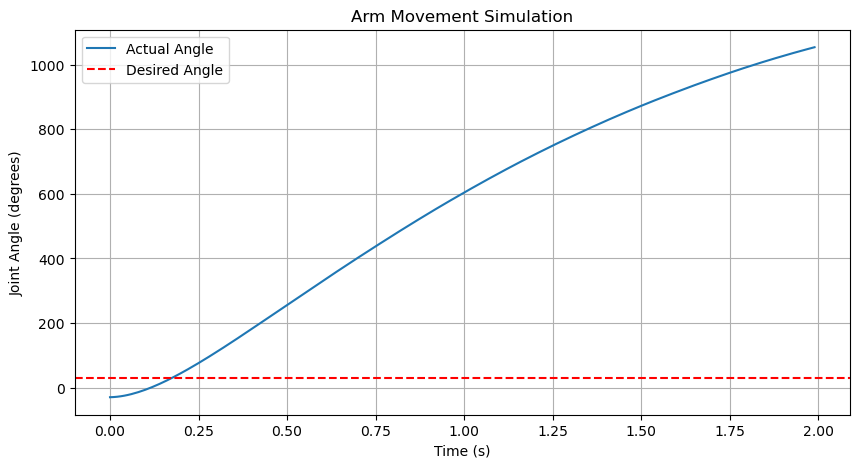

In [10]:
plt.figure(figsize=(10, 5))
plt.plot(time, np.rad2deg(angles), label='Actual Angle')
plt.axhline(np.rad2deg(desired_angle), color='r', linestyle='--', label='Desired Angle')
plt.xlabel('Time (s)')
plt.ylabel('Joint Angle (degrees)')
plt.legend()
plt.title('Arm Movement Simulation')
plt.grid(True)
plt.show()

## Bonus Challenge
Modify your controller to get the arm to reach the desired angle
as quickly and stably as possible.

**Instructor Note:**
This notebook contains the solution version. The student version should have the `controller()` function body blanked out, prompting them to implement their own.